### Student Information
Name: 簡子霖

Student ID: M1406785

GitHub ID: kevinchien920819

---

### Instructions

### First Phase Submission

1. First: do the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) that considered as **phase 1 (from exercise 1 to exercise 15)**. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: follow the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** up **until phase 1**. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    -  Use [the new dataset](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/newdataset/Reddit-stock-sentiment.csv). The dataset contains a 16 columns including 'text' and 'label', with the sentiment labels being: 1.0 is positive, 0.0 is neutral and -1.0 is negative. You can simplify the dataset and use only the columns that you think are necessary. 
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.
    - Use this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 10% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    


4. Fourth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__

You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (September 28th 11:59 pm, Sunday)__. 

### Second Phase Submission 

**You can keep the answer for phase 1 for easier running and update the phase 2 on the same page.**

1. First: Continue doing the **take home** exercises in the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) for **phase 2, starting from Finding frequent patterns**. Use the same master(.ipynb) file. Answer from phase 1 will not be considered at this stage. You can answer in the master file. __This part is worth 10% of your grade.__


2. Second: Continue from first phase and do the same process from the [DM2025-Lab1-Master](https://github.com/leoson-wu/DM2025-Lab1-Exercise/blob/main/DM2025-Lab1-Master.ipynb) on **the new dataset** for phase 2, starting from Finding frequent pattern. You can skip some exercises if you think some steps are not necessary. However main exercises should be completed. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 15% of your grade.__
    - Continue using this file to complete the homework from the second part. Make sure the code can be run from the beginning till the end and has all the needed output. Use the same new dataset as in phase 1.
    
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.

3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 20% of your grade.__
    - Use this file to answer.
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency).  Refer to this Scikit-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Note that for the TF-IDF features you might need to use other type of NB classifier different than the one in the Master Notebook. Comment on the differences and when using augmentation with feature pattern.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be handled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 5% of your grade.__


You can submit your homework following these guidelines: [DM2025-Lab1-announcement](https://github.com/leoson-wu/DM2025-Lab1-Announcement/blob/main/README.md). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 19th 11:59 pm, Sunday)__. 

# Phase 1

In [1]:
# install wordcloud if not installed
!uv add wordcloud
!uv sync

Resolved 169 packages in 7ms
Audited 158 packages in 1ms
Resolved 169 packages in 7ms
Audited 158 packages in 1ms


In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import seaborn as sns
from helpers import data_mining_helpers as dmh

In [3]:
df = pd.read_csv("./newdataset/Reddit-stock-sentiment.csv")

# 只保留必要欄位
data = df[['text', 'label']].dropna()

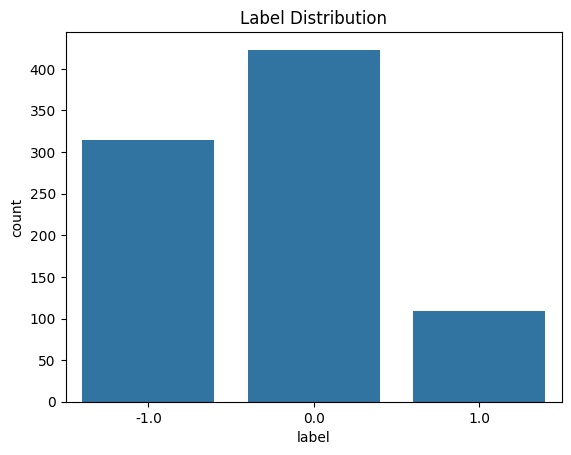

In [4]:
sns.countplot(x='label', data=data)
plt.title("Label Distribution")
plt.show()


### **>>> Exercise 1 (Watch Video):**  
In this exercise, please print out the *text* data for the first three samples in the dataset. (See the above code for help)

In [5]:
# Answer here
for i in range(3):
    print(f"example {i + 1}:\n")
    print(data.text.values[i])


example 1:

Calls on retards
example 2:

Stunt as in like why did they even make a big deal about starting it in the first place? No company should ever talk about politics ever.
example 3:

Seeing lots of red in the ticker.


### **>>> Exercise 3 (Watch Video):**  
Try to fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.

In [6]:
data.loc[data['label'].eq(1)][::10][:5]

,text,label
3,Vision Marine Technologies Inc. is rewriting t...,1.0
78,I think it’s gonna work itself out. I bought t...,1.0
168,The obvious can also be refreshing from CNBC: ...,1.0
219,Same. Back to break even after that last rip b...,1.0
319,Etrade has a feed of news articles about how r...,1.0


### >>> **Exercise 4 (Watch Video):** 
Let's try something different. Instead of calculating missing values by column let's try to calculate the missing values in every record instead of every column.  
$Hint$ : `axis` parameter. Check the documentation for more information.

In [7]:
data.isnull().apply(lambda x: dmh.check_missing_values(x), axis=1)

0      (The amoung of missing records is: , 0)
1      (The amoung of missing records is: , 0)
2      (The amoung of missing records is: , 0)
3      (The amoung of missing records is: , 0)
4      (The amoung of missing records is: , 0)
                        ...                   
842    (The amoung of missing records is: , 0)
843    (The amoung of missing records is: , 0)
844    (The amoung of missing records is: , 0)
845    (The amoung of missing records is: , 0)
846    (The amoung of missing records is: , 0)
Length: 847, dtype: object

### >>> **Exercise 7 (Watch Video):**
Notice that for the `ylim` parameters we hardcoded the maximum value for y. Is it possible to automate this instead of hard-coding it? How would you go about doing that? (Hint: look at code above for clues)

<Axes: title={'center': 'Label Distribution'}, xlabel='Label', ylabel='Frequency'>

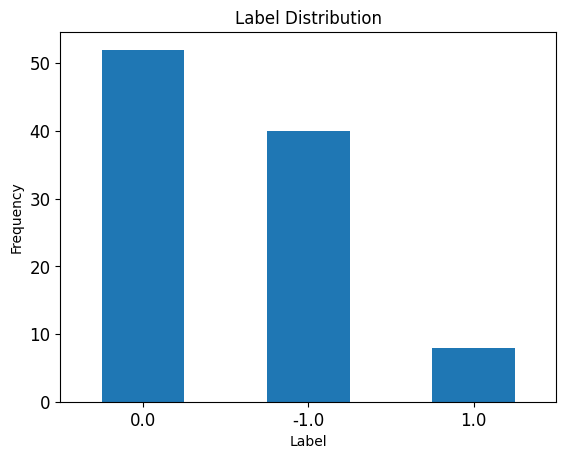

In [8]:
data_sample = data.sample(n=100)

data_sample.label.value_counts().plot(kind='bar',
                                      title='Label Distribution',
                                      xlabel='Label',
                                      ylabel='Frequency',
                                      rot=0,fontsize=12)

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

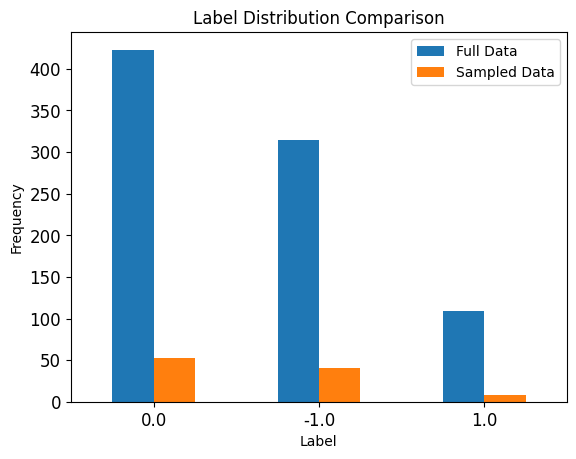

In [9]:
data_count = data['label'].value_counts()
data_sample_count = data_sample['label'].value_counts()

count_df = pd.DataFrame({'Full Data': data_count, 'Sampled Data': data_sample_count})
count_df.plot(kind='bar', title='Label Distribution Comparison', rot=0, fontsize=12)
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()

### **>>> Exercise 9 (Watch Video):**
Let's analyze the first record of our X dataframe with the new analyzer we have just built. Go ahead try it!

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
analyze = count_vect.build_analyzer()
analyze(data.text[0])

['calls', 'on', 'retards']

In [11]:
data['clean_text'] = data['text'].apply(dmh.clean_text)
data


,text,label,clean_text
0,Calls on retards,-1.0,calls on retards
1,Stunt as in like why did they even make a big ...,0.0,stunt as in like why did they even make a big ...
2,Seeing lots of red in the ticker.,0.0,seeing lots of red in the ticker
3,Vision Marine Technologies Inc. is rewriting t...,1.0,vision marine technologies inc is rewriting th...
4,He didn’t say thank you.,-1.0,he didnt say thank you
...,...,...,...
842,Invest now it is going to shoot up tomorrow,1.0,invest now it is going to shoot up tomorrow
843,Where can I read this?,0.0,where can i read this
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,upgrades downgrades\n\n stock analyst recommen...
845,i sold my puts so i expect cheeto to declare w...,-1.0,i sold my puts so i expect cheeto to declare w...


In [12]:
# we prepare three different label text for the wordcloud
positive_text = " ".join(data[data['label']==1]['clean_text'])
negative_text = " ".join(data[data['label']==-1]['clean_text'])
neutral_text  = " ".join(data[data['label']==0]['clean_text'])

Text(0.5, 1.0, 'Positive WordCloud')

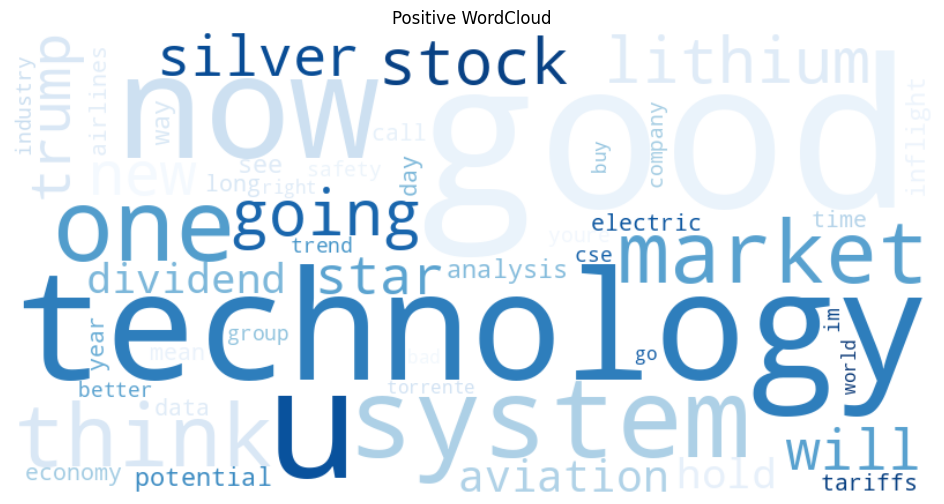

In [13]:
wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Blues', max_words=50, collocations=False).generate(positive_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Positive WordCloud")

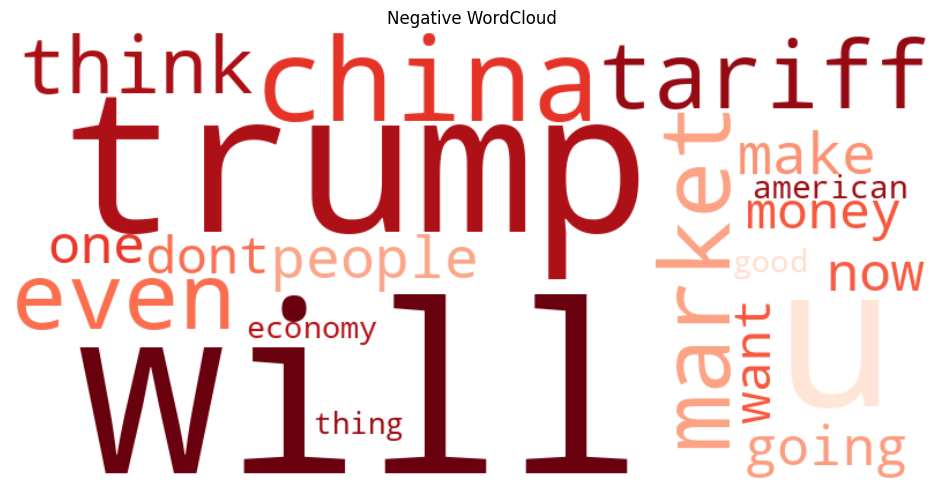

In [14]:
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap="Reds", max_words=20, collocations=False).generate(negative_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Negative WordCloud")
plt.show()

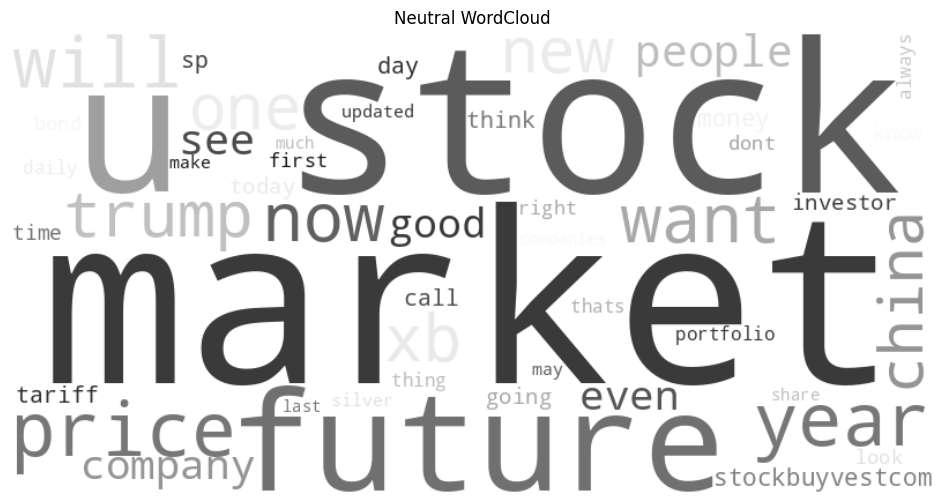

In [15]:
wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap="Grays", max_words=50, collocations=False).generate(neutral_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Neutral WordCloud")
plt.show()

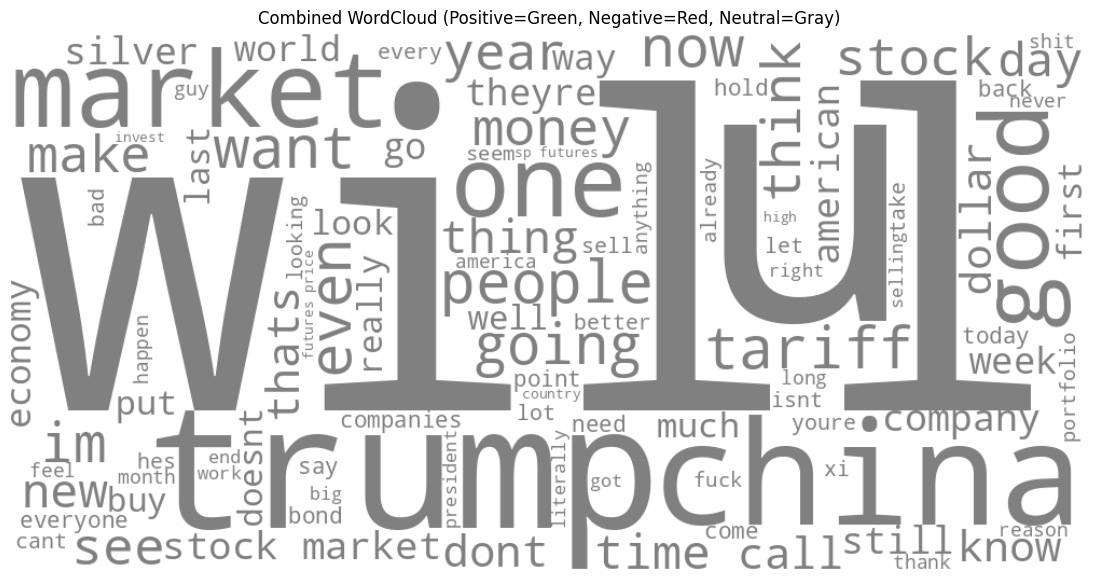

In [16]:
# 合併成一個大字典 (key=詞, value=類別)
from collections import defaultdict
word_category = defaultdict(str)

for word in positive_text.split():
    word_category[word] = "pos"
for word in negative_text.split():
    word_category[word] = "neg"
for word in neutral_text.split():
    word_category[word] = "neu"
    
all_text = positive_text + " " + negative_text + " " + neutral_text
# 定義顏色函數
def color_func(word,font_size, position, orientation, random_state=None, **kwargs):
    category = word_category.get(word, "neu")
    if category == "pos":
        return "green"   # 正向 = 綠色
    elif category == "neg":
        return "red"     # 負向 = 紅色
    else:
        return "gray"    # 中立 = 灰色
# 產生 WordCloud
wc = WordCloud(
    width=1000, 
    height=500, 
    background_color="white",
    max_words=100 # TODO: 調整顯示的最大詞數
).generate(all_text)

# 套用顏色
plt.figure(figsize=(15,7))
plt.imshow(wc.recolor(color_func=color_func, random_state=3), interpolation="bilinear")
plt.axis("off")
plt.title("Combined WordCloud (Positive=Green, Negative=Red, Neutral=Gray)")
plt.show()

# Phase 2

In [17]:
X = df.copy()
X

,type,datetime,post_id,subreddit,title,author,url,upvotes,downvotes,upvote_ratio,text,subjectivity,polarity,sentiment,entities,label
0,comment,2025-04-11 17:29:56,mmli62w,wallstreetbets,Retardation is on the menu boys! WSB is so back,StickyTip420,https://i.redd.it/0yq2ftren8ue1.jpeg,0,NaN,NaN,Calls on retards,1.000000,-0.900000,-1.0,[],-1.0
1,comment,2025-04-12 1:12:19,mmnu7v9,wallstreetbets,Retail giant TARGET has now declined for 10 co...,Comfortable-Dog-8437,https://i.redd.it/7tl6puv9waue1.jpeg,-15,NaN,NaN,Stunt as in like why did they even make a big ...,0.177778,0.083333,1.0,"['Stunt', 'company', 'deal', 'place']",0.0
2,comment,2025-04-10 15:09:41,mmeevio,StockMarket,How do you feel about a sitting president maki...,Btankersly66,https://apnews.com/article/trump-truth-social-...,1,NaN,NaN,Seeing lots of red in the ticker.,0.000000,0.000000,0.0,['ticker'],0.0
3,post,2023-08-30 17:12:55,165kllm,stockstobuytoday,Who knows more? $VMAR,emiljenfn,https://www.reddit.com/r/stockstobuytoday/comm...,30,0.0,0.98,Vision Marine Technologies Inc. is rewriting t...,0.646970,0.216383,1.0,"['watercraft', 'skill', 'power', ']', 'feat', ...",1.0
4,comment,2025-04-11 14:48:05,mmkl6bw,StockMarket,The Trump administration is begging Xi Jinping...,Just-Big6411,https://edition.cnn.com/2025/04/10/politics/tr...,1,NaN,NaN,He didn’t say thank you.,0.000000,0.000000,0.0,[],-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,comment,2021-06-30 4:06:06,h3iv6pq,stockstobuytoday,$MRIN Marin Software killed it today. Hope som...,Ordinary-Office9180,https://www.reddit.com/r/stockstobuytoday/comm...,1,NaN,NaN,Invest now it is going to shoot up tomorrow,0.000000,0.000000,0.0,['tomorrow'],1.0
843,comment,2025-04-11 5:01:24,mmijiuz,StockMarket,$ U.S. dollar value (crashing),lulububudu,https://i.redd.it/atvlo83gk4ue1.jpeg,2,NaN,NaN,Where can I read this?,0.000000,0.000000,0.0,[],0.0
844,post,2025-03-24 12:30:39,1jipi4v,stockstobuytoday,Analyst Recommendations,saasfin,https://www.reddit.com/r/stockstobuytoday/comm...,1,0.0,1.00,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.000000,0.000000,0.0,"['Analyst', 'Nasdaq', 'Stock', 'Upgrades', 'Do...",0.0
845,comment,2025-04-11 20:13:26,mmmely7,wallstreetbets,Weekend Discussion Thread for the Weekend of A...,yes_ur_wrong,https://www.reddit.com/r/wallstreetbets/commen...,10,NaN,NaN,i sold my puts so i expect cheeto to declare w...,0.000000,0.000000,0.0,"['war', 'denmark', 'cheeto', 'i']",-1.0


In [18]:
X = X[['text', 'sentiment']].dropna()
X['sentiment_name'] = X['sentiment'].map({-1: 'negative', 0: 'neutral', 1: 'positive'})
X

,text,sentiment,sentiment_name
0,Calls on retards,-1.0,negative
1,Stunt as in like why did they even make a big ...,1.0,positive
2,Seeing lots of red in the ticker.,0.0,neutral
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive
4,He didn’t say thank you.,0.0,neutral
...,...,...,...
842,Invest now it is going to shoot up tomorrow,0.0,neutral
843,Where can I read this?,0.0,neutral
844,"Upgrades, Downgrades\n\n [Stock Analyst Recomm...",0.0,neutral
845,i sold my puts so i expect cheeto to declare w...,0.0,neutral


In [19]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

categories = X['sentiment_name'].unique()  # Get unique category labels
category_dfs = {}  # Dictionary to store DataFrames for each category

for category in categories:
    # Filter the original DataFrame by category
    category_dfs[category] = X[X['sentiment_name'] == category].copy()

# Function to create term-document frequency DataFrame for each category
def create_term_document_df(df):
    count_vect = CountVectorizer()  # Initialize the CountVectorizer
    X_counts = count_vect.fit_transform(df['text'])  # Transform the text data into word counts
    
    # Get the unique words (vocabulary) from the vectorizer
    words = count_vect.get_feature_names_out()
    
    # Create a DataFrame where rows are documents and columns are words
    term_document_df = pd.DataFrame(X_counts.toarray(), columns=words)
    
    return term_document_df

# Create term-document frequency DataFrames for each category
filt_term_document_dfs = {}  # Dictionary to store term-document DataFrames for each category

for category in categories:
    filt_term_document_dfs[category] = create_term_document_df(category_dfs[category])

### >>> **Exercise 16**

In [20]:
category_number=0 #You can change it from 0 to 3

# Filter the bottom 1% and top 5% words based on their sum across all documents
def filter_top_bottom_words_by_sum(term_document_df, top_percent=0.05, bottom_percent=0.01):
    # Calculate the sum of each word across all documents
    word_sums = term_document_df.sum(axis=0)
    
    # Sort the words by their total sum
    sorted_words = word_sums.sort_values()
    
    # Calculate the number of words to remove
    total_words = len(sorted_words)
    top_n = int(top_percent * total_words)
    bottom_n = int(bottom_percent * total_words)
    
    # Get the words to remove from the top 5% and bottom 1%
    words_to_remove = pd.concat([sorted_words.head(bottom_n), sorted_words.tail(top_n)]).index
    print(f'Bottom {bottom_percent*100}% words: \n{sorted_words.head(bottom_n)}') #Here we print which words correspond to the bottom percentage we filter
    print(f'Top {top_percent*100}% words: \n{sorted_words.tail(top_n)}') #Here we print which words correspond to the top percentage we filter
    # Return the DataFrame without the filtered words
    return term_document_df.drop(columns=words_to_remove)

# Apply the filtering function to each category
term_document_dfs = {}

for category in categories:
    print(f'\nFor category {category} we filter the following words:')
    term_document_dfs[category] = filter_top_bottom_words_by_sum(filt_term_document_dfs[category])

# Example: Display the filtered DataFrame for one of the categories
print(f"Filtered Term-Document Frequency DataFrame for Category {categories[category_number]}:")
term_document_dfs[categories[category_number]]



For category negative we filter the following words:
Bottom 1.0% words: 
wit           1
writing       1
17th          1
ws            1
wsb           1
xeqt          1
1700          1
ya            1
2011          1
2s            1
11            1
125           1
13            1
140           1
portfolios    1
poses         1
dtype: int64
Top 5.0% words: 
too          9
make         9
some         9
want         9
economy      9
          ... 
it          99
is         113
and        121
to         144
the        236
Length: 81, dtype: int64

For category positive we filter the following words:
Bottom 1.0% words: 
sqqq           1
insurance      1
int            1
integrated     1
intel          1
intent         1
industrial     1
inequality     1
inevitable     1
infinity       1
steady         1
steam          1
stearns        1
spot           1
spread         1
sputter        1
instrument     1
squibb         1
stage          1
stan           1
stances        1
inheritance    1
in

,01378,027,10,100,100k,100x,12,14th,15,150,...,yet,yields,yikes,yippee,yo,your,yourselves,youtube,yup,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 17:** 

In [21]:
from PAMI.extras.convert.DF2DB import DF2DB            

# Loop through the dictionary of term-document DataFrames
for category in term_document_dfs:
    # Replace dots with underscores in the category name to avoid errors in the file creation
    category_safe = category.replace('.', '_')
    
    # Create the DenseFormatDF object and convert to a transactional database
    obj = DF2DB(term_document_dfs[category])           
        
    obj.convert2TransactionalDatabase(f'td_freq_db_{category_safe}.csv', '>=', 1)


Database size (total no of transactions) : 317
Number of items : 2940
Minimum Transaction Size : 1
Average Transaction Size : 16.681388012618296
Maximum Transaction Size : 197
Standard Deviation Transaction Size : 22.322190525831648
Variance in Transaction Sizes : 499.8570259154255
Sparsity : 0.9943260584991094


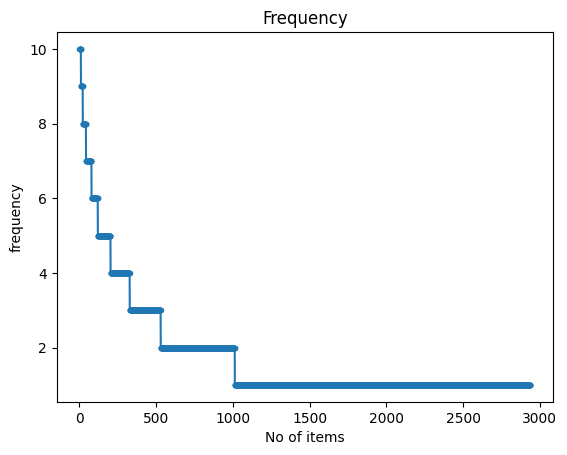

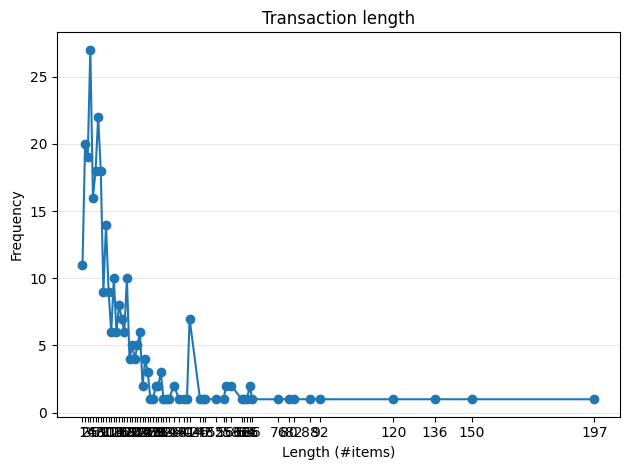

In [22]:
from PAMI.extras.dbStats import TransactionalDatabase as tds
obj = tds.TransactionalDatabase('td_freq_db_positive.csv')
obj.run()
obj.printStats()
obj.plotGraphs()

In [23]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=6
obj1 = alg.FPGrowth(iFile='td_freq_db_positive.csv', minSup=minSup)
obj1.mine()
frequentPatternsDF_positive= obj1.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_positive)))
print('Runtime: ' + str(obj1.getRuntime()))
obj1.save(f'freq_patterns_positive_minSup{minSup}.txt')
frequentPatternsDF_positive

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 120
Runtime: 0.004026651382446289


,Patterns,Support
0,ever,6
1,months,6
2,end,6
3,actually,6
4,used,6
...,...,...
115,today,10
116,america,10
117,thanks,10
118,everyone,10


In [24]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=6
obj2 = alg.FPGrowth(iFile='td_freq_db_neutral.csv', minSup=minSup)
obj2.mine()
frequentPatternsDF_neutral= obj2.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_neutral)))
print('Runtime: ' + str(obj2.getRuntime()))
obj2.save(f'freq_patterns_neutral_minSup{minSup}.txt')
frequentPatternsDF_neutral

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 33
Runtime: 0.07223391532897949


,Patterns,Support
0,call,6
1,news,6
2,re,6
3,anything,6
4,already,6
5,out,6
6,btcusd,6
7,ethusd,6
8,ethusd\tbtcusd,6
9,pepeusd,6


In [25]:
from PAMI.frequentPattern.basic import FPGrowth as alg

minSup=6
obj3 = alg.FPGrowth(iFile='td_freq_db_negative.csv', minSup=minSup)
obj3.mine()
frequentPatternsDF_negative= obj3.getPatternsAsDataFrame()
print('Total No of patterns: ' + str(len(frequentPatternsDF_negative)))
print('Runtime: ' + str(obj3.getRuntime()))
obj3.save(f'freq_patterns_negative_minSup{minSup}.txt')
frequentPatternsDF_negative

Frequent patterns were generated successfully using frequentPatternGrowth algorithm
Total No of patterns: 46
Runtime: 0.0016222000122070312


,Patterns,Support
0,retard,6
1,investment,6
2,seems,6
3,went,6
4,without,6
5,life,6
6,man,6
7,does,6
8,idiot,6
9,least,6


In [26]:
import pandas as pd

#We group together all of the dataframes related to our found patterns
dfs = [frequentPatternsDF_positive, frequentPatternsDF_neutral, frequentPatternsDF_negative]


# Identify patterns that appear in more than one category
# Count how many times each pattern appears across all dataframes
pattern_counts = {}
for df in dfs:
    for pattern in df['Patterns']:
        if pattern not in pattern_counts:
            pattern_counts[pattern] = 1
        else:
            pattern_counts[pattern] += 1

# Filter out patterns that appear in more than one dataframe
unique_patterns = {pattern for pattern, count in pattern_counts.items() if count == 1}
# Calculate the total number of patterns across all categories
total_patterns_count = sum(len(df) for df in dfs)
# Calculate how many patterns were discarded
discarded_patterns_count = total_patterns_count - len(unique_patterns)

# For each category, filter the patterns to keep only the unique ones
filtered_dfs = []
for df in dfs:
    filtered_df = df[df['Patterns'].isin(unique_patterns)]
    filtered_dfs.append(filtered_df)

# Merge the filtered dataframes into a final dataframe
final_pattern_df = pd.concat(filtered_dfs, ignore_index=True)

# Sort by support
final_pattern_df = final_pattern_df.sort_values(by='Support', ascending=False)

# Display the final result
print(final_pattern_df)
# Print the number of discarded patterns
print(f"Number of patterns discarded: {discarded_patterns_count}")

     Patterns  Support
97    country       10
99      where       10
100     today       10
102    thanks       10
96     pretty       10
..        ...      ...
129      life        6
128      went        6
142  probably        6
143      year        6
141     other        6

[157 rows x 2 columns]
Number of patterns discarded: 42


In [27]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Convert 'text' column into term-document matrix using CountVectorizer
count_vect = CountVectorizer()
X_tdm = count_vect.fit_transform(X['text'])  # X['text'] contains your text data
terms = count_vect.get_feature_names_out()  # Original terms in the vocabulary

# Tokenize the sentences into sets of unique words
X['tokenized_text'] = X['text'].str.split().apply(set)

# Initialize the pattern matrix
pattern_matrix = pd.DataFrame(0, index=X.index, columns=final_pattern_df['Patterns'])

# Iterate over each pattern and check if all words in the pattern are present in the tokenized sentence
for pattern in final_pattern_df['Patterns']:
    pattern_words = set(pattern.split())  # Tokenize pattern into words
    pattern_matrix[pattern] = X['tokenized_text'].apply(lambda x: 1 if pattern_words.issubset(x) else 0)

# Convert the term-document matrix to a DataFrame for easy merging
tdm_df = pd.DataFrame(X_tdm.toarray(), columns=terms, index=X.index)

# Concatenate the original TDM and the pattern matrix to augment the features
augmented_df = pd.concat([tdm_df, pattern_matrix], axis=1)

augmented_df

,00,000,01378,02,027,03,06,08,10,100,...,mean,over,idiot,does,man,life,went,probably,year,other
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
842,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
843,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
844,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### >>> **Exercise 18**

In [28]:
#Applying dimensionality reduction with only the document-term frequency data
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt

#This might take a couple of minutes to execute
# Apply PCA, t-SNE, and UMAP to the data
X_pca_tdm = PCA(n_components=2).fit_transform(tdm_df.values)
X_tsne_tdm = TSNE(n_components=2).fit_transform(tdm_df.values)
X_umap_tdm = umap.UMAP(n_components=2).fit_transform(tdm_df.values)

In [29]:
X_pca_tdm.shape

(847, 2)

In [30]:
X_tsne_tdm.shape

(847, 2)

In [31]:
X_umap_tdm.shape

(847, 2)

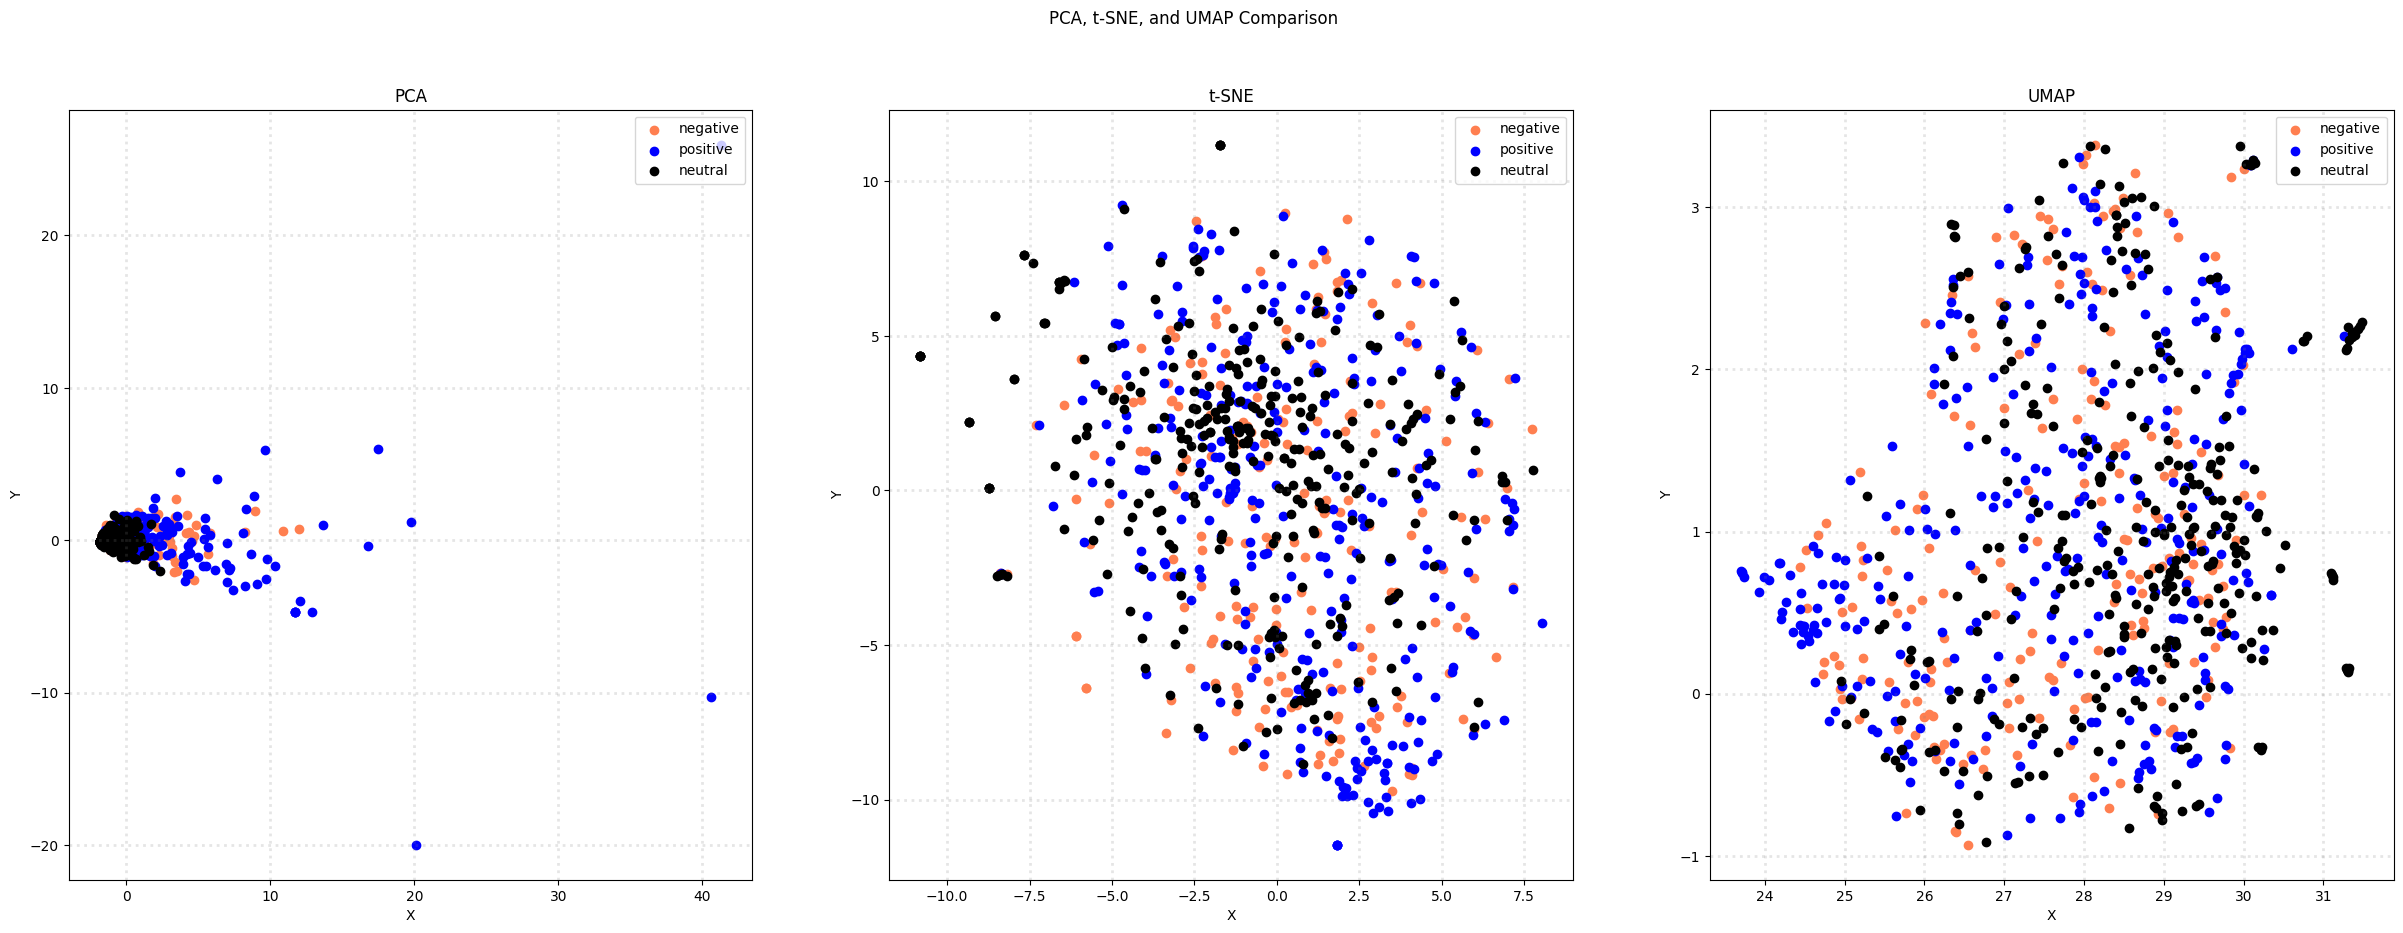

In [32]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment_name'] == category].T[0]
        ys = X_reduced[X['sentiment_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Step 4: Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_tdm, 'PCA')
plot_scatter(axes[1], X_tsne_tdm, 't-SNE')
plot_scatter(axes[2], X_umap_tdm, 'UMAP')

plt.show()

In [33]:
#This might take a couple of minutes to execute
#Applying dimensionality reduction with both the document-term frequency data and the pattern derived data
# Apply PCA, t-SNE, and UMAP to the data
X_pca_aug = PCA(n_components=2).fit_transform(augmented_df.values)
X_tsne_aug = TSNE(n_components=2).fit_transform(augmented_df.values)
X_umap_aug = umap.UMAP(n_components=2).fit_transform(augmented_df.values)

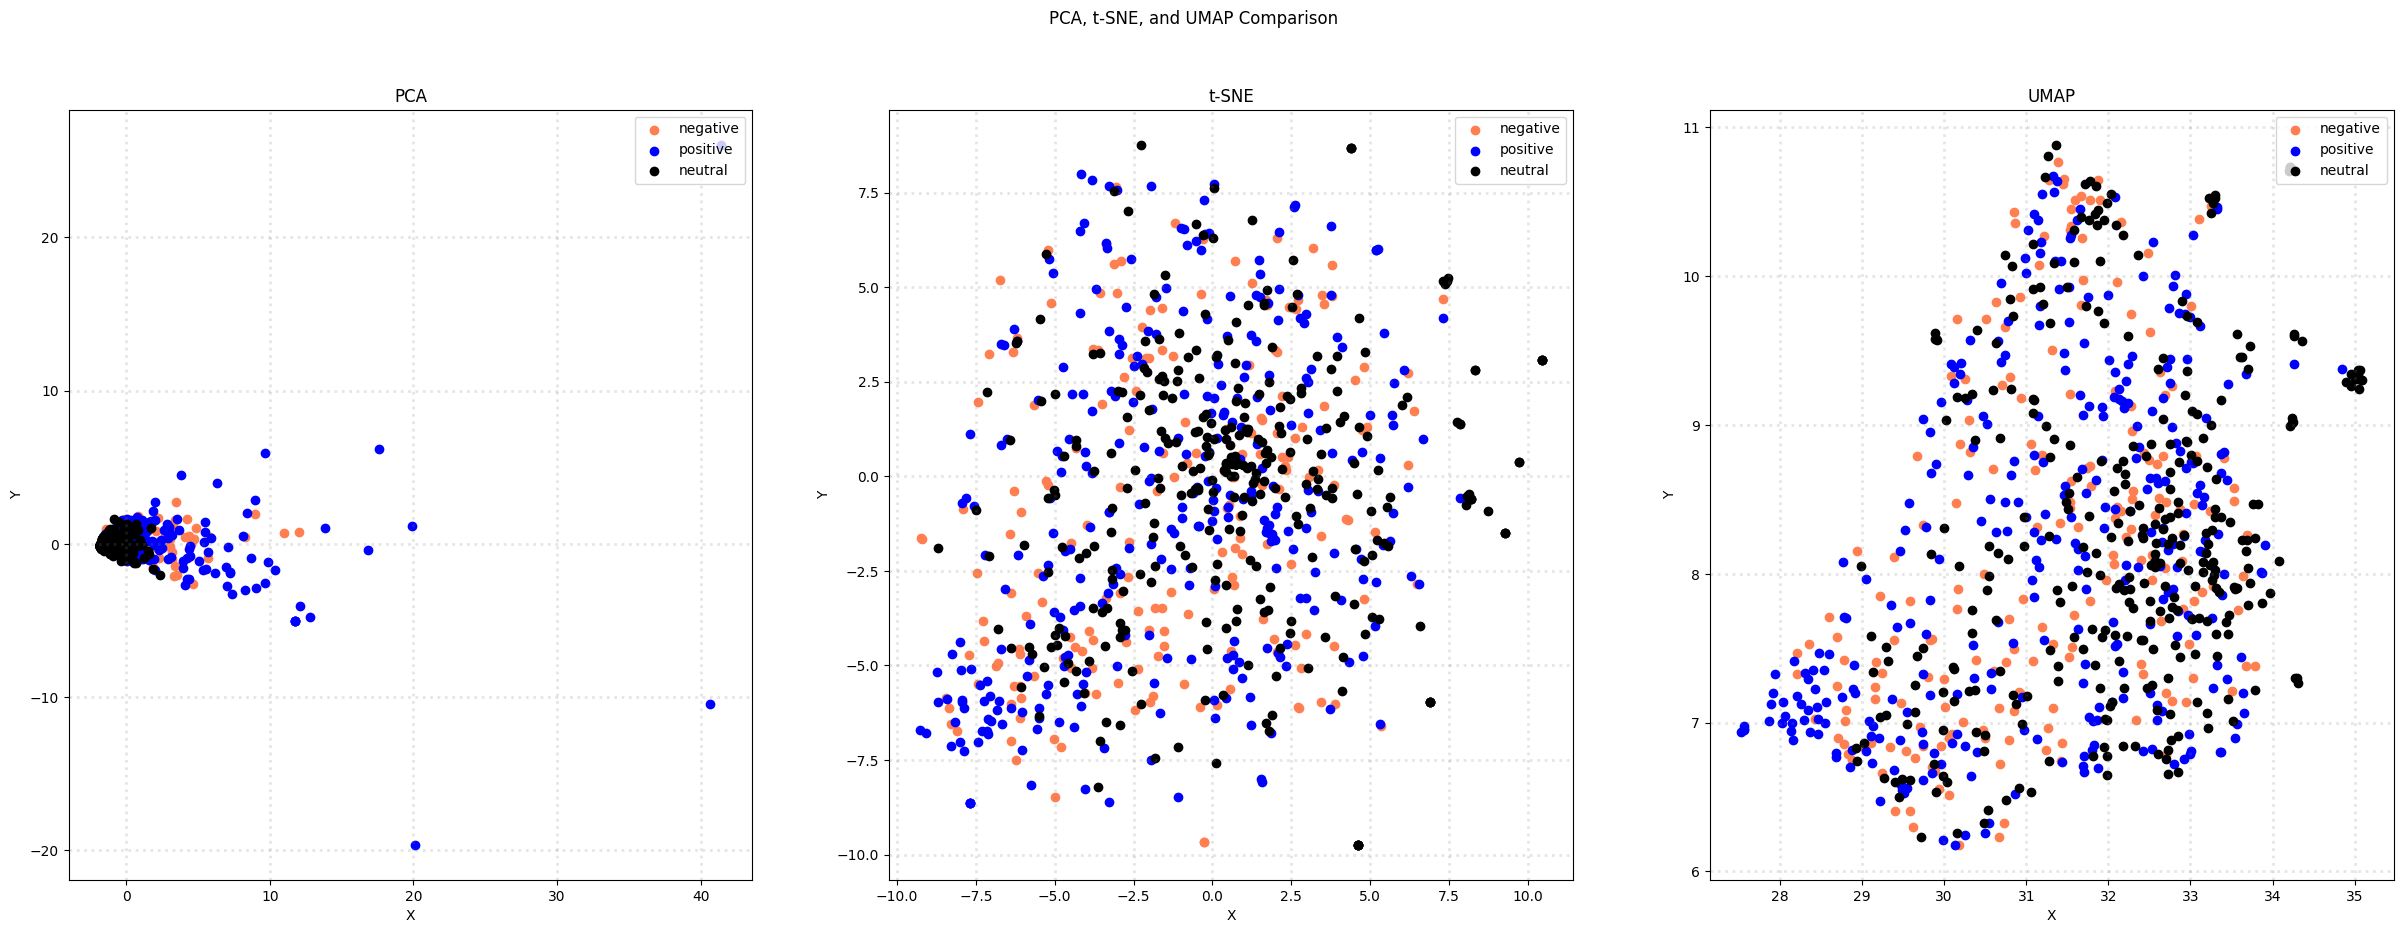

In [34]:
# Plot the results in subplots
col = ['coral', 'blue', 'black', 'orange']
categories = X['sentiment_name'].unique() 

fig, axes = plt.subplots(1, 3, figsize=(30, 10))  # Create 3 subplots for PCA, t-SNE, and UMAP
fig.suptitle('PCA, t-SNE, and UMAP Comparison')

# Define a function to create a scatter plot for each method
def plot_scatter(ax, X_reduced, title):
    for c, category in zip(col, categories):
        xs = X_reduced[X['sentiment_name'] == category].T[0]
        ys = X_reduced[X['sentiment_name'] == category].T[1]
        ax.scatter(xs, ys, c=c, marker='o', label=category)
    
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_title(title)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.legend(loc='upper right')

# Create scatter plots for PCA, t-SNE, and UMAP
plot_scatter(axes[0], X_pca_aug, 'PCA')
plot_scatter(axes[1], X_tsne_aug, 't-SNE')
plot_scatter(axes[2], X_umap_aug, 'UMAP')

plt.show()

/tmp/ipykernel_165801/4224424385.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
/tmp/ipykernel_165801/4224424385.py:34: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
/tmp/ipykernel_165801/4224424385.py:40: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax3.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
/tmp/ipykernel_165801/4224424385.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax4.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2],
/tmp/ipykernel_165801/4224424385.py:53: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax5.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2],
/tmp/ipykernel_165801/4224424385.p

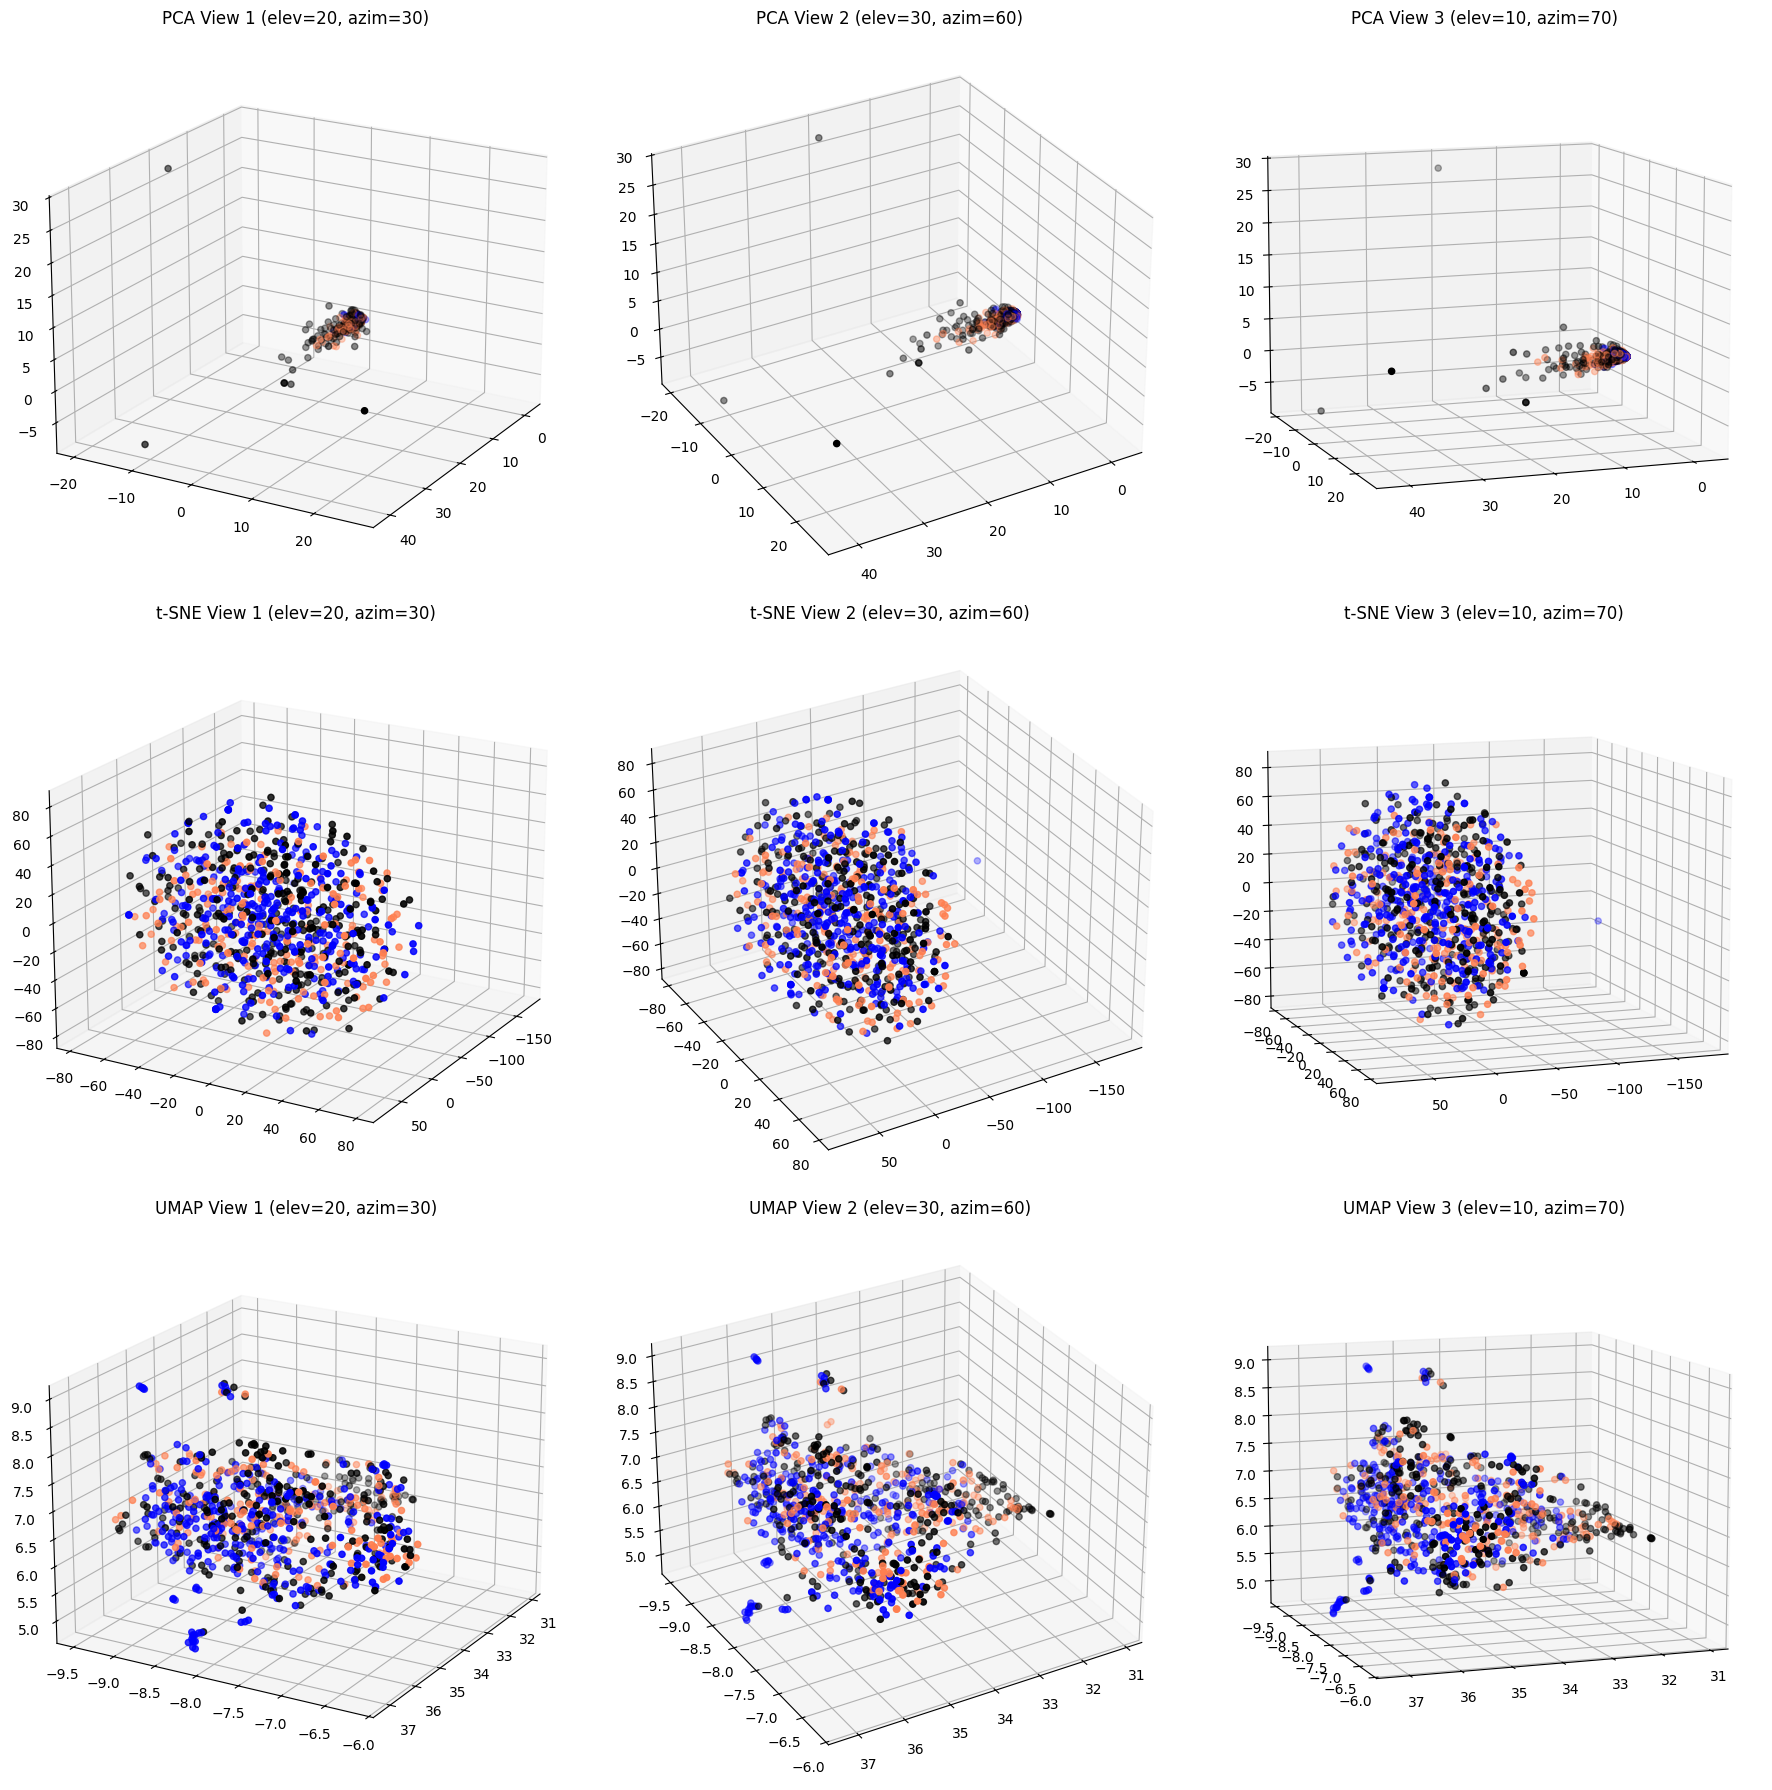

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap

# ===== PCA 降維到 3 維 =====
pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(augmented_df)

# ===== t-SNE 降維到 3 維 =====
tsne_3d = TSNE(n_components=3)
X_tsne_3d = tsne_3d.fit_transform(augmented_df)

# ===== UMAP 降維到 3 維 =====
umap_3d = umap.UMAP(n_components=3)
X_umap_3d = umap_3d.fit_transform(augmented_df)

# ===== 類別顏色 =====
col = np.array(['coral', 'blue', 'black', 'orange'])
colors = col[X['sentiment'].astype('category').cat.codes]

# ======== 建立整合圖 (3x3) ========
fig = plt.figure(figsize=(18, 18))

# --- PCA 三視角 ---
ax1 = fig.add_subplot(331, projection='3d')
ax1.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
            c=colors, cmap='viridis', s=20)
ax1.view_init(elev=20, azim=30)
ax1.set_title('PCA View 1 (elev=20, azim=30)')

ax2 = fig.add_subplot(332, projection='3d')
ax2.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
            c=colors, cmap='viridis', s=20)
ax2.view_init(elev=30, azim=60)
ax2.set_title('PCA View 2 (elev=30, azim=60)')

ax3 = fig.add_subplot(333, projection='3d')
ax3.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2],
            c=colors, cmap='viridis', s=20)
ax3.view_init(elev=10, azim=70)
ax3.set_title('PCA View 3 (elev=10, azim=70)')

# --- t-SNE 三視角 ---
ax4 = fig.add_subplot(334, projection='3d')
ax4.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2],
            c=colors, cmap='viridis', s=20)
ax4.view_init(elev=20, azim=30)
ax4.set_title('t-SNE View 1 (elev=20, azim=30)')

ax5 = fig.add_subplot(335, projection='3d')
ax5.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2],
            c=colors, cmap='viridis', s=20)
ax5.view_init(elev=30, azim=60)
ax5.set_title('t-SNE View 2 (elev=30, azim=60)')

ax6 = fig.add_subplot(336, projection='3d')
ax6.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2],
            c=colors, cmap='viridis', s=20)
ax6.view_init(elev=10, azim=70)
ax6.set_title('t-SNE View 3 (elev=10, azim=70)')

# --- UMAP 三視角 ---
ax7 = fig.add_subplot(337, projection='3d')
ax7.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2],
            c=colors, cmap='viridis', s=20)
ax7.view_init(elev=20, azim=30)
ax7.set_title('UMAP View 1 (elev=20, azim=30)')

ax8 = fig.add_subplot(338, projection='3d')
ax8.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2],
            c=colors, cmap='viridis', s=20)
ax8.view_init(elev=30, azim=60)
ax8.set_title('UMAP View 2 (elev=30, azim=60)')

ax9 = fig.add_subplot(339, projection='3d')
ax9.scatter(X_umap_3d[:, 0], X_umap_3d[:, 1], X_umap_3d[:, 2],
            c=colors, cmap='viridis', s=20)
ax9.view_init(elev=10, azim=70)
ax9.set_title('UMAP View 3 (elev=10, azim=70)')

plt.tight_layout()
plt.show()


In [36]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy

### >>> **Exercise 19**

In [37]:
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.sentiment)
X['bin_sentiment'] = mlb.transform(X['sentiment']).tolist()
X[0:9]

,text,sentiment,sentiment_name,tokenized_text,bin_sentiment
0,Calls on retards,-1.0,negative,"{retards, on, Calls}","[1, 0, 0]"
1,Stunt as in like why did they even make a big ...,1.0,positive,"{did, about, talk, it, should, place?, big, a,...","[0, 0, 1]"
2,Seeing lots of red in the ticker.,0.0,neutral,"{ticker., of, lots, Seeing, in, red, the}","[0, 1, 0]"
3,Vision Marine Technologies Inc. is rewriting t...,1.0,positive,"{collaboration, Vision, rewriting, groundbreak...","[0, 0, 1]"
4,He didn’t say thank you.,0.0,neutral,"{He, thank, you., say, didn’t}","[0, 1, 0]"
5,"Hoping to ejaculate in wet warm puss tonight, ...",1.0,positive,"{me, to, warm, tonight,, luck, wish, wet, ejac...","[0, 0, 1]"
6,Trump will respond to china increasing their t...,-1.0,negative,"{to, few, be, all, starting., it, down, weeks,...","[1, 0, 0]"
7,Confirmed not a trap. Its been like this for p...,1.0,positive,"{trap., by, it, just, months,, Confirmed, prob...","[0, 0, 1]"
8,Am I the only one seeing the cup & handle brea...,1.0,positive,"{to, Green, technicals, Am, breakout, base, on...","[0, 0, 1]"


### >>> **Exercise 20**

In [38]:
# We retrieve 3 sentences for a random record
document_to_transform_1 = []
random_record_1 = X.iloc[10]
random_record_1 = random_record_1['text']
document_to_transform_1.append(random_record_1)

document_to_transform_2 = []
random_record_2 = X.iloc[100]
random_record_2 = random_record_2['text']
document_to_transform_2.append(random_record_2)

document_to_transform_3 = []
random_record_3 = X.iloc[500]
random_record_3 = random_record_3['text']
document_to_transform_3.append(random_record_3)

In [39]:
print(document_to_transform_1)
print(document_to_transform_2)
print(document_to_transform_3)

["It's a copy/paste from a Bloomberg terminal."]
['Do we have a copy of trump’s kindergarten graduation certificate? Ideally the long form version.']
['Everyone is talking about the Bond market. But the rates for the bond market are still lower than the rates they had earlier this year.\n\nWhat is everyone talking about?']


In [40]:
from sklearn.preprocessing import binarize

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# print vectors
print("Let's take a look at the count vectors:")
print(document_vector_count_1.todense())
print(document_vector_count_2.todense())
print(document_vector_count_3.todense())

Let's take a look at the count vectors:
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]]


In [41]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)

# Print 
print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.109109
Cosine Similarity using count bw 1 and 3: 0.000000
Cosine Similarity using count bw 2 and 3: 0.142857
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


/tmp/ipykernel_165801/452772485.py:13: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
/tmp/ipykernel_165801/452772485.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
/tmp/ipykernel_165801/452772485.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("Cosine Similarity using count bw 2 and 3: %

### >>> **Exercise 21~24 :**

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np
import pandas as pd

X_ori_train, X_ori_test, y_ori_train, y_ori_test = train_test_split(tdm_df, X['sentiment_name'], test_size=0.3, random_state=42)
X_aug_train, X_aug_test, y_aug_train, y_aug_test = train_test_split(augmented_df, X['sentiment_name'], test_size=0.3, random_state=42)

nb_origin = MultinomialNB()
nb_origin.fit(X_ori_train, y_ori_train)
y_ori_pred = nb_origin.predict(X_ori_test)

nb_augmented = MultinomialNB()
nb_augmented.fit(X_aug_train, y_aug_train)
y_aug_pred = nb_augmented.predict(X_aug_test)

dt_origin = DecisionTreeClassifier(random_state=42)
dt_origin.fit(X_ori_train, y_ori_train)
y_ori_dt_pred = dt_origin.predict(X_ori_test)

dt_augmented = DecisionTreeClassifier(random_state=42)
dt_augmented.fit(X_aug_train, y_aug_train)
y_aug_dt_pred = dt_augmented.predict(X_aug_test)

def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"{model_name} Evaluation:")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Classification Report:\n", classification_report(y_true, y_pred))
    print("\n")
evaluate_model(y_ori_test, y_ori_pred, model_name="Original Data - Naive Bayes")
evaluate_model(y_aug_test, y_aug_pred, model_name="Augmented Data - Naive Bayes")
evaluate_model(y_ori_test, y_ori_dt_pred, model_name="Original Data - Decision Tree")
evaluate_model(y_aug_test, y_aug_dt_pred, model_name="Augmented Data - Decision Tree")


Original Data - Naive Bayes Evaluation:
Accuracy: 0.4823529411764706
Classification Report:
               precision    recall  f1-score   support

    negative       0.29      0.31      0.30        51
     neutral       0.72      0.32      0.45       105
    positive       0.48      0.74      0.58        99

    accuracy                           0.48       255
   macro avg       0.50      0.46      0.44       255
weighted avg       0.54      0.48      0.47       255



Augmented Data - Naive Bayes Evaluation:
Accuracy: 0.47843137254901963
Classification Report:
               precision    recall  f1-score   support

    negative       0.31      0.35      0.33        51
     neutral       0.69      0.33      0.45       105
    positive       0.48      0.70      0.57        99

    accuracy                           0.48       255
   macro avg       0.49      0.46      0.45       255
weighted avg       0.53      0.48      0.47       255



Original Data - Decision Tree Evaluation:
Accu